# 지하철 이용승객 분석 EDA

# 1. 필요한 라이브러리 가져오기

In [1]:
# 필요한 라이브러리를 불러옵니다.

import os # 폴더/파일을 관리하는 os 라이브러리
import pandas as pd
# 시각화를 위한 설정하기
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# Google Drive 마운트
drive.mount('/content/drive')

# 파일이 저장된 Google Drive 경로 설정
drive_dir_path = '/content/drive/MyDrive/AI+X/'

# 해당 경로의 파일 목록 확인
files = os.listdir(drive_dir_path)

Mounted at /content/drive


# 2. raw 파일 불러오기
- 실습을 통해 모두 통합한 파일 불러오기

In [2]:
raw = pd.read_csv('/content/drive/MyDrive/AI+X/subway_raw.csv')
display(raw)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-02-01,금,6호선,이태원,15786.0,21324.0,37110.0,2019-02,02-01,20190204
1,2019-02-01,금,6호선,한강진,9085.0,10665.0,19750.0,2019-02,02-01,20190204
2,2019-02-01,금,6호선,버티고개,2660.0,2486.0,5146.0,2019-02,02-01,20190204
3,2019-02-01,금,3호선,약수,4245.0,4396.0,8641.0,2019-02,02-01,20190204
4,2019-02-01,금,5호선,청구,4236.0,4612.0,8848.0,2019-02,02-01,20190204
...,...,...,...,...,...,...,...,...,...,...
107023,2019-04-30,화,1호선,종로5가,32828.0,33182.0,66010.0,2019-04,04-30,20190503
107024,2019-04-30,화,3호선,종로3가,37628.0,35721.0,73349.0,2019-04,04-30,20190503
107025,2019-04-30,화,1호선,종각,51823.0,50610.0,102433.0,2019-04,04-30,20190503
107026,2019-04-30,화,2호선,시청,32485.0,32917.0,65402.0,2019-04,04-30,20190503


# 3. 2019.01 ~ 06  중 언제 지하철을 가장 많이 이용했는지 보려면 어떤 데이터를 이용해야할까?

- 연월별 or 월일별 데이터 분석
    - 1개월을 기준으로 잘라보자
    - 자른뒤에 승하차총 승객 수를 더해보자!

- 요일별 데이터 분석
    - 요일로 잘라보자
    - 자른뒤에 승하차총 승객 수를 더해보자!

## 3.1 연월 데이터 분석을 통해 1월 ~ 6월 중 가장 많이 이용한 달 구하기

In [3]:
# 연월로 데이터를 묶고, 묶은 상태에서 해당 달의 승하자총승객수의 총합을 더해서 구하기, 이후 reset_index()로 DataFrame  형태로 만들기
monthly_usage = raw.groupby('연월')['승하자총승객수'].sum().reset_index()
display(monthly_usage)

,연월,승하자총승객수
0,2019-01,442746389.0
1,2019-02,379836010.0
2,2019-03,466692826.0
3,2019-04,470934348.0
4,2019-05,485718557.0
5,2019-06,442210635.0


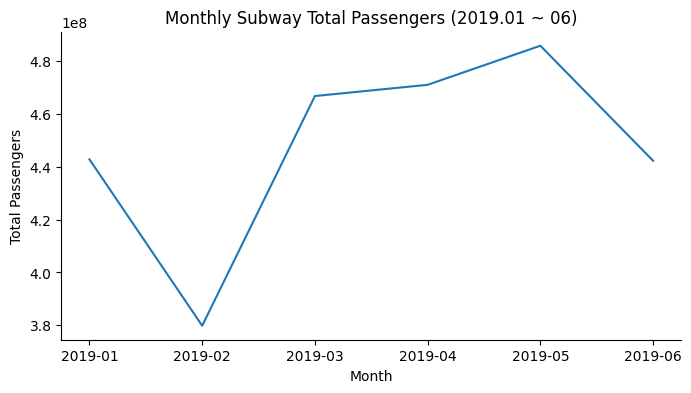

In [4]:
# @title 3.1.1  월별 이용자수 구하기_시각화

monthly_usage.plot(kind='line', x='연월', y='승하자총승객수', figsize=(8, 4), title='Monthly Subway Total Passengers (2019.01 ~ 06)', legend=False)
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

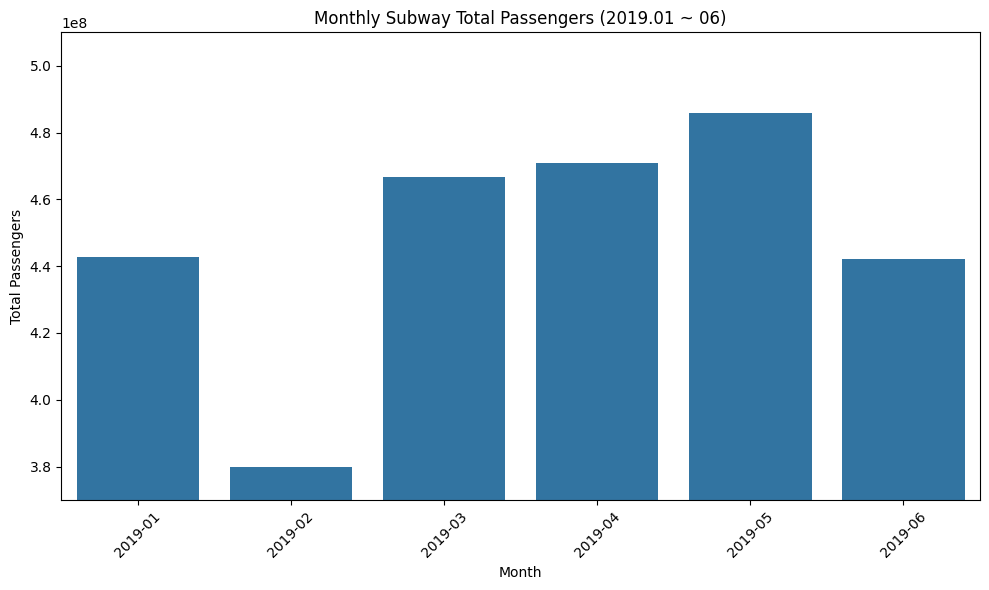

In [5]:
# @title 3.1.2 월별 이용자수 구하기_시각화

plt.figure(figsize=(10, 6))
sns.barplot(x='연월', y='승하자총승객수', data=monthly_usage)
plt.title('Monthly Subway Total Passengers (2019.01 ~ 06)')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.ylim(370000000, monthly_usage['승하자총승객수'].max() * 1.05) # Y축 범위 설정 -> 차이를 극대화 시켜주기 위해서
plt.tight_layout()
plt.show()

## 3.2 가장 많이 이용한 요일 분석하기

In [6]:
# 요일로 데이터를 묶고, 묶은 상태에서 해당 요일의 승하자총승객수의 총합을 더해서 구하기, 이후 reset_index()로 DataFrame  형태로 만들기
day_usage = raw.groupby('요일')['승하자총승객수'].sum().reset_index()
display(day_usage)

,요일,승하자총승객수
0,금,445310717.0
1,목,428684383.0
2,수,421134136.0
3,월,391555551.0
4,일,247523995.0
5,토,341950018.0
6,화,411979965.0


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


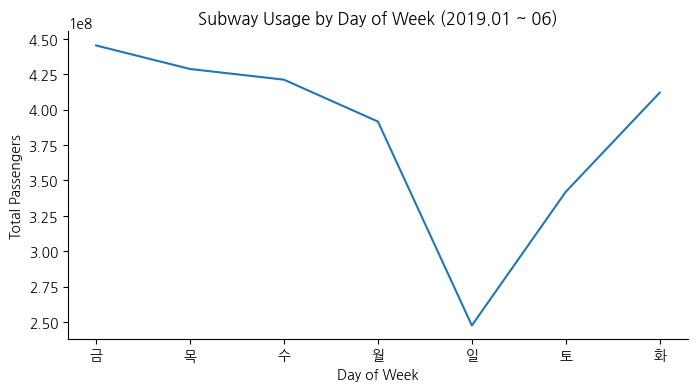

In [7]:
# @title 3.2.1 요일별 이용자수 구하기_시각화

from matplotlib import font_manager as fm
import matplotlib as mpl

# 폰트 설정
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum -qq

fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

mpl.rcParams['font.family'] = 'NanumGothic'
day_usage.plot(kind='line', x='요일', y='승하자총승객수', figsize=(8, 4), title='Subway Usage by Day of Week (2019.01 ~ 06)', legend=False)
plt.xlabel('Day of Week')
plt.ylabel('Total Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

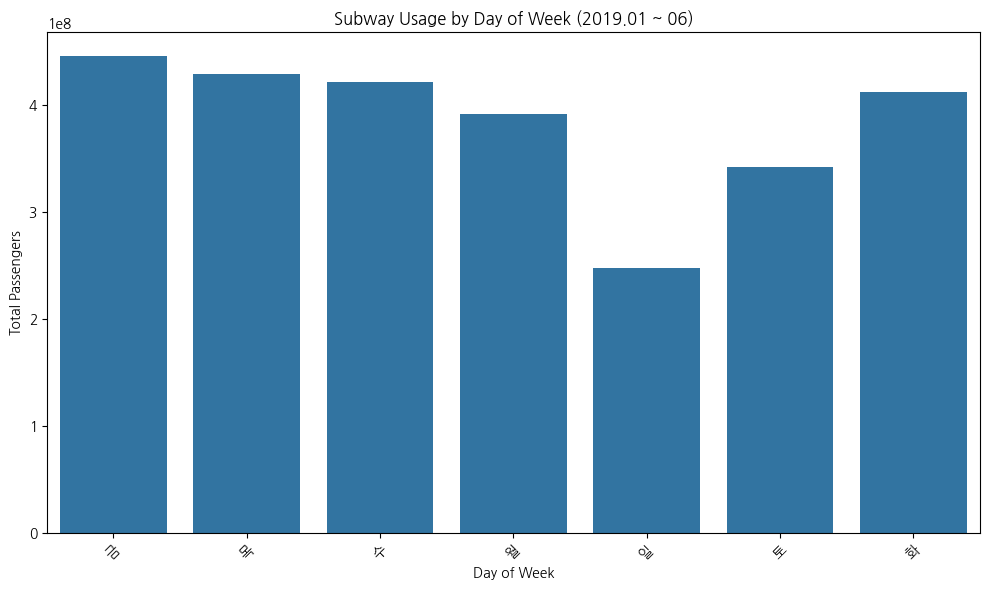

In [8]:
# @title 3.2.2 요일별 이용자수 구하기_시각화

plt.figure(figsize=(10, 6))
sns.barplot(x='요일', y='승하자총승객수', data = day_usage)
plt.title('Subway Usage by Day of Week (2019.01 ~ 06)')
plt.xlabel('Day of Week')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 결과를 통해 가설 확인하기

- 가설) 1월 ~ 6월 중에 5월에 지하철 승객수가 많다?
    - 맞음!

- 가설) 요일(월화수목금토일) 중에 목요일 승객수가 많다?
    - 틀리다! 금요일이 가장 많음!

# 5. 연월 각각에 대해 일자별 승하차총승객수 그래프 그리려면 어떤 데이터를 이용해야 할까?

- 연월로 자른 데이터에 대해서 일자별로 자르고 해당 일자에 대한 이용 승객 수 합해서 구하기

## 5.1 연월 각각에 대해 일자별 승하차총승객수 데이터 얻기

In [9]:
# raw 데이터를 연월과 월일로 그룹화하기, 이후에 각 그룹별로 '승하자총승객수'를 합산하여 하루에 얼마나 많이 사용하는 지를 월별로 나타냄!
daily_usage = (raw.groupby(['연월','월일'], as_index=False)['승하자총승객수'].sum()
                  .sort_values(['연월','월일'])) # 1월 부터 오름차순으로 보기

display(daily_usage)

,연월,월일,승하자총승객수
0,2019-01,01-01,6813453.0
1,2019-01,01-02,15214002.0
2,2019-01,01-03,15716213.0
3,2019-01,01-04,16509281.0
4,2019-01,01-05,12092335.0
...,...,...,...
176,2019-06,06-26,16561790.0
177,2019-06,06-27,16365644.0
178,2019-06,06-28,17170712.0
179,2019-06,06-29,12601537.0


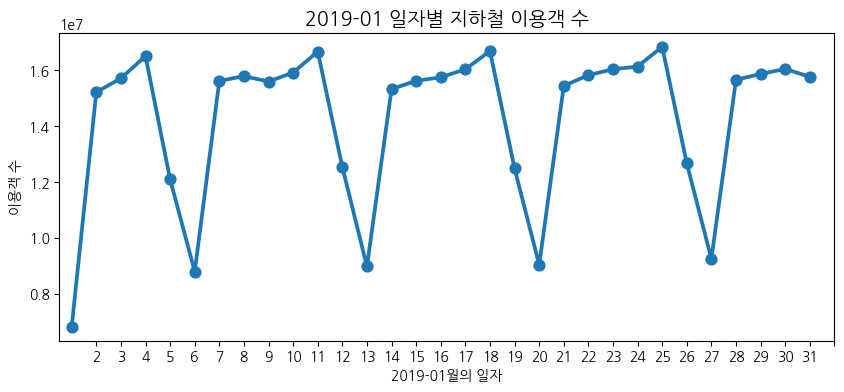

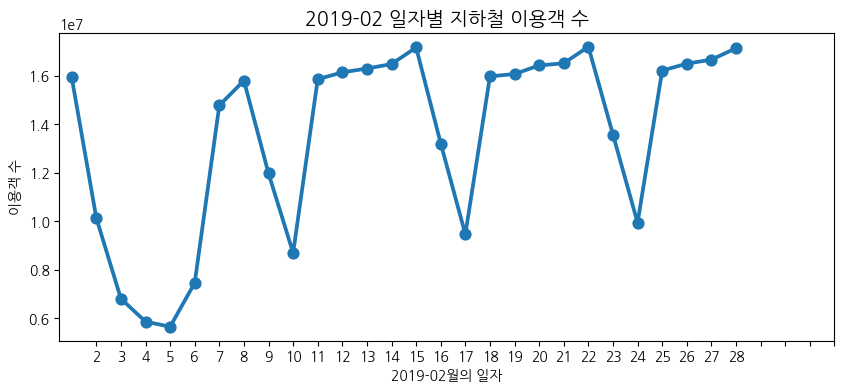

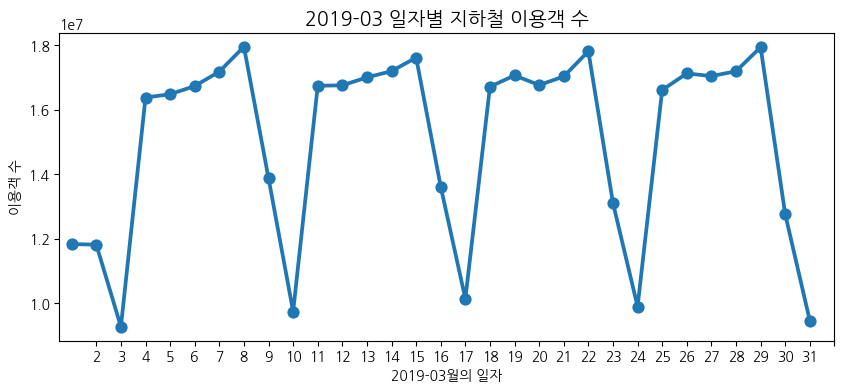

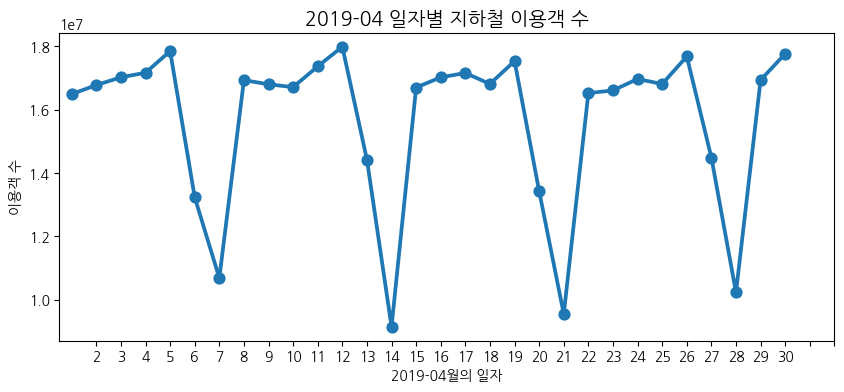

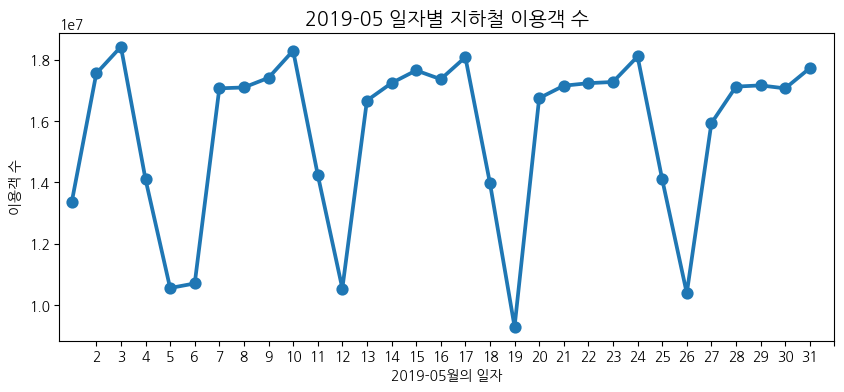

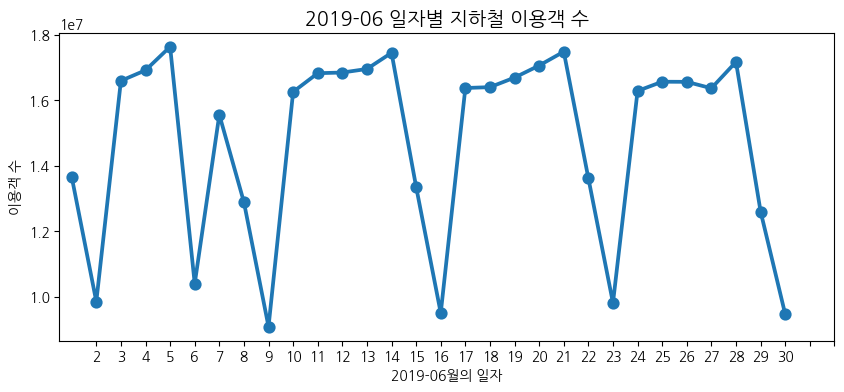

In [10]:
# @title 5.1.1 연월 각각에 대해 일자별 승하차총승객수 그래프 시각화

# 월-일 에서 일데이터만 가져와서 사용하기!
daily_usage['일'] = daily_usage['월일'].str.split('-').str[1].astype(int)

# 연월에서 unique한 값을 모아서 달만 모아주기
months = daily_usage['연월'].unique()

# months로 루프 돌기
for m in months:
    sub = daily_usage[daily_usage['연월'] == m] # 특정 월에 해당되는 데이터만 가져오기
    plt.figure(figsize=(10,4))

    # pointplot를 통한 시각화하기!
    sns.pointplot(
        data=sub, x="일", y="승하자총승객수"
    )

    plt.title(f"{m} 일자별 지하철 이용객 수", fontsize=14)
    plt.xlabel(f"{m}월의 일자")
    plt.ylabel("이용객 수")
    plt.xticks(range(1, 32))  # 무조건 31일까지 출력 되도록하기 만약 28일, 30일에서 끝난다면 빈칸으로 나오도록!
    plt.show()

# 6. 가장 승객이 많이 타는 승차역을 구하려면 어떤 데이터가 필요할까?

- raw을 보고 어떤 속성이 있었는지 확인
    - 승차총승객수 속성이 존재!
    - 가장큰 승차총승객 수를 통해서 역명 찾기!

In [11]:
# 어떤 속성이 있었는지 확인해보자!
display(raw)

# 승차총승객수를 이용하자!
# 일단 역명으로 그룹화하고, 승차총승객수로 합을 내어서 내림차순 정렬! -> 뭔가 sql로 데이터 다루는 거랑 비슷한디??
station_usage = (
    raw.groupby('역명', as_index=False)['승차총승객수'].sum()
       .sort_values('승차총승객수', ascending=False)
)

# 가장 승차 인원이 많은 역 보기 (상위 10개 보도록 하자)
display(station_usage.head(10))

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-02-01,금,6호선,이태원,15786.0,21324.0,37110.0,2019-02,02-01,20190204
1,2019-02-01,금,6호선,한강진,9085.0,10665.0,19750.0,2019-02,02-01,20190204
2,2019-02-01,금,6호선,버티고개,2660.0,2486.0,5146.0,2019-02,02-01,20190204
3,2019-02-01,금,3호선,약수,4245.0,4396.0,8641.0,2019-02,02-01,20190204
4,2019-02-01,금,5호선,청구,4236.0,4612.0,8848.0,2019-02,02-01,20190204
...,...,...,...,...,...,...,...,...,...,...
107023,2019-04-30,화,1호선,종로5가,32828.0,33182.0,66010.0,2019-04,04-30,20190503
107024,2019-04-30,화,3호선,종로3가,37628.0,35721.0,73349.0,2019-04,04-30,20190503
107025,2019-04-30,화,1호선,종각,51823.0,50610.0,102433.0,2019-04,04-30,20190503
107026,2019-04-30,화,2호선,시청,32485.0,32917.0,65402.0,2019-04,04-30,20190503


,역명,승차총승객수
413,잠실,18574323.0
11,강남,18148024.0
33,고속터미널,17541287.0
496,홍대입구,17270084.0
247,서울역,17165598.0
214,사당,13294251.0
302,신림,12831374.0
255,선릉,11582155.0
51,구로디지털단지,11421335.0
300,신도림,11420882.0


## 6.1 가장 승객이 많이 타는 승차역 결론

- 잠실역이다!

# 7. 노선별로 역별/요일별 승차승객수를 비교하려면 데이터를 어떻게 다뤄야 할까?*이탤릭체 텍스트*

- 노선과 역을 그룹화하고 묶은 데이터를 요일로 나타내기

## 7.1 노선별로 역별, 요일별 승차객수를 위한 테이터 구하기

In [12]:
line = raw.groupby(['노선명', '역명','요일'], as_index=False)['승차총승객수'].sum()

display(line)
# n호선 m역 월~일 요일의 승차총승객수를 구할 수 있음!

,노선명,역명,요일,승차총승객수
0,1호선,가능,금,210822.0
1,1호선,가능,목,205504.0
2,1호선,가능,수,204871.0
3,1호선,가능,월,195014.0
4,1호선,가능,일,130598.0
...,...,...,...,...
3558,인천선,계양,수,316657.0
3559,인천선,계양,월,300470.0
3560,인천선,계양,일,170631.0
3561,인천선,계양,토,241778.0


In [13]:
# @title 7.1.1 노선별로 역별, 요일별 승차객수 비교 시각화(heatmap)

# 요일 고정 배열 만들기
weekday = ["월","화","수","목","금","토","일"]

""" Param
    line: ['노선명','역명','요일','승차총승객수'] 아까 구한 데이터 받기
    line_name: 특정 노선 / None이면 전체
    info: 셀에 숫자 표시 여부
    """
def heatmap_by_station(line, line_name=None, info=False):
    LINE = line.copy()

    # 특정 호선을 선택한 경우에는 해당 노선에 대한 데이터만 가져오기
    if line_name:
        LINE = LINE[LINE['노선명'] == line_name]

    # 요일 순서 고정하는 방법 : Categorical(범주형 데이터로 만들기) -> categories = weekday(내가 지정한 배열로 고정하기!, 기존의 문자열 오름차순 벗어나기) -> ordered=True(범주형 데이터를 순서로 다루기)
    LINE['요일'] = pd.Categorical(LINE['요일'], categories = weekday, ordered=True)

    # 역*요일 피벗 테이블(가상 테이블) 만들기
    pivot = LINE.pivot_table(
        index='역명', # 행: 역명을 행으로 두기 가장 좌측에서 어떤 역인지 알려주기
        columns='요일', # 열: 요일(월~일)을 행으로 두기
        values='승차총승객수', # 값: 행과 열이 만든 곳에 승차총승객수를 합해서 넣기, 즉 --역의 --일 승차총승객수합이 들어가는 것!
        aggfunc='sum'
    )

    plt.figure(figsize=(10, max(4, len(pivot)*0.35)))


    sns.heatmap(
        pivot, # 시각화할 데이터
        cmap="YlOrRd", # Yl -> Or -> Rd : 노 -> 주 -> 빨
        annot=info, # 셀에 데이터 표기
        fmt=".0f", # 정수형태로 제공하기
        cbar_kws={'label': '승차총승객수'} # 판단 기준 제공하기 (우측에 막대기)
    )

    # title : 특정 호선을 구하는 경우에는 몇 호선 인지 적어주기
    title = f"역별 요일에 대한 승차승객수 히트맵" + (f" · {line_name}" if line_name else "")
    plt.title(title)
    plt.xlabel("요일")
    plt.ylabel("역명")
    plt.tight_layout()
    plt.show()

# 전체 히트맵! , 수치도 같이 나오도록하기
heatmap_by_station(line,info=True)

# 1호선 부터 9호선까지
for i in range(1,10):
    heatmap_by_station(line, line_name=f"{i}호선", info=True)

Output hidden; open in https://colab.research.google.com to view.

# 8. 1호선에서 가장 하차를 많이 하는 역 구하기

- 1호선 데이터 가져오기
    - 역명 그룹화하기
    - 하차총승객 합하기
    - 내림차순 정렬


In [14]:
# 1호선 데이터만 필터랑하기
line1 = raw[raw['노선명'] == '1호선']

# 역명으로 묶고 하차총승객수 합을 구해서 내림차순 정렬하기
line1_alighting_usage = (
    line1.groupby('역명', as_index=False)['하차총승객수'].sum()
       .sort_values('하차총승객수', ascending=False)
)

display(line1_alighting_usage)
display(line1_alighting_usage.head(1))

,역명,하차총승객수
1,가산디지털단지,10571381.0
52,수원,10226609.0
62,영등포,9432067.0
69,용산,7817685.0
12,노량진,7603258.0
...,...,...
40,서동탄,287651.0
83,진위,271336.0
36,봉명,238683.0
32,배방,195569.0


,역명,하차총승객수
1,가산디지털단지,10571381.0


## 8.1 1호선에서 가장 하차를 많이 하는 역 결론

- 가산디지털단지역

# 9. 2호선중에서 어느 역에서 승차가 가장 많이 발생할까?

- 2호선 필터링
    - 역명 그룹화
    - 승차총승객수 합하기
    - Folium 사용

In [15]:
# 12호선 데이터만 필터랑하기
line2 = raw[raw['노선명'] == '2호선']

# 역명으로 묶고 승차총승객수 합을 구해서 내림차순 정렬하기
line2_riding_usage = (
    line2.groupby('역명', as_index=False)['승차총승객수'].sum()
       .sort_values('승차총승객수', ascending=False)
)
# display(line2_riding_usage)

# 지하철노선위경도정보 가져오기
geo_file = os.path.join(drive_dir_path, '지하철노선위경도정보2.csv')
subway_geo = pd.read_csv(geo_file)
# display(subway_geo)

# 2호선 승차정보의 '역명'과 지하철노선위경도정보의 '역이름' 합치기
merged_line2_geo = pd.merge(line2_riding_usage, subway_geo, left_on='역명', right_on='역이름', how='inner')

# '역이름' 합치는 경우 -> 다른 호선이 지나가는 환승 역의 경우에 다른 호선 정보에 2호선 승차정보가 입력됨!
# '호선' 컬럼을 기준으로 2호선만 필터링
merged_line2_geo = merged_line2_geo[merged_line2_geo['호선'] == '2호선']
display(merged_line2_geo)

,역명,승차총승객수,역이름,역지역,위도,경도,호선
0,잠실,18574323.0,잠실,수도권,37.513309,127.100215,2호선
2,강남,18148024.0,강남,수도권,37.498085,127.027978,2호선
4,홍대입구,17270084.0,홍대입구,수도권,37.556864,126.923765,2호선
7,사당,13294251.0,사당,수도권,37.476553,126.981549,2호선
9,신림,12831374.0,신림,수도권,37.484264,126.929741,2호선
10,선릉,11582155.0,선릉,수도권,37.504494,127.048948,2호선
12,구로디지털단지,11421335.0,구로디지털단지,수도권,37.485253,126.901473,2호선
13,신도림,11420882.0,신도림,수도권,37.508905,126.891308,2호선
15,건대입구,11123655.0,건대입구,수도권,37.540398,127.069203,2호선
17,삼성,10611401.0,삼성,수도권,37.508812,127.063021,2호선


In [16]:
# @title 승차가 많이 발생하는 2호선역 시각화(Folium)
import folium

# 지도 가져오기!
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 가장 승차 총 승객수가 많은 역 찾기
max_station = merged_line2_geo.loc[merged_line2_geo['승차총승객수'].idxmax()]

for index, row in merged_line2_geo.iterrows():
    station_name = row['역명']
    lat = row['위도']
    lon = row['경도']
    cnt = row['승차총승객수']

    # 누르면 뜨는 정보
    popup_text = f"{station_name}<br>승차 숭객 수: {cnt:,.0f}"
    tooltip_text = station_name

    # 가장 승차객이 많은 역은 빨간색으로 뜨게하기, 아닌 것은 기본으로
    if station_name == max_station['역명']:
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color='red')
        ).add_to(m)
    else:
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            tooltip=tooltip_text
        ).add_to(m)

display(m)

In [17]:
# 지도를 HTML 파일로 저장
map_file_path = os.path.join(drive_dir_path, 'subway_line2_map.html')
m.save(map_file_path)

print(f"지도 저장 하기: {map_file_path}")

지도 저장 하기: /content/drive/MyDrive/AI+X/subway_line2_map.html
